## Business Problem: Identifying Fuel Price Manipulation and Price Gouging in Kenya
<p><img style="float: top;margin:5px 20px 5px 1px; min-width:90%, max-height:20px" src="https://netstorage-tuko.akamaized.net/images/93512322e14ef394.jpg"></p>
<p>Fuel prices in Kenya are often subject to fluctuations and inconsistencies, raising concerns about potential manipulation and unfair pricing practices. Consumers and regulators require insights into these dynamics for better transparency and market regulation.
Objective: Utilize a Kenyan fuel price dataset to develop a data analysis model that can identify patterns and anomalies suggestive of fuel price manipulation and price gouging.
</p>

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df=pd.read_csv(r"C:\Users\DATA-JOHN\Desktop\Fuel Prices\Fuel Prices in Kenya since 2010 - Sheet1.csv")

df.head()

,Price Commencement Date,Premium Motor Spirit (PMS)/Super Petrol (KES/Litre),Automotive Gas Oil (AGO)/Diesel (KES/Litre),Illuminating Kerosene (IK)/Kerosene (KES/Litre),Mean Exchange Rate,Murban Crude Oil Prices ($ per barrel),Murban Crude Oil Prices (KES/Litre)
0,15/12/2010,94.03,87.45,75.83,80.57,89.15,45.18
1,15/01/2011,95.67,88.71,77.51,81.03,89.17,45.45
2,15/02/2011,98.08,91.72,79.52,81.47,88.58,45.39
3,15/03/2011,102.44,94.53,83.97,84.21,102.86,54.48
4,15/04/2011,111.17,107.52,90.91,83.89,109.53,57.79


## Data Exploration

In [3]:
#renaming columns
df=df.rename(columns={'Premium Motor Spirit (PMS)/Super Petrol (KES/Litre)':'Super Petrol (KES/Litre)',
                   'Automotive Gas Oil (AGO)/Diesel (KES/Litre)':'Diesel (KES/Litre)',
                   ' Illuminating Kerosene (IK)/Kerosene (KES/Litre)':'Kerosene (KES/Litre)',
                   'Murban Crude Oil Prices ($ per barrel)':'Crude Oil Prices ($ per barrel)',
                   'Murban Crude Oil Prices (KES/Litre)':'Crude Oil Prices (KES/Litre)'})


In [4]:
#checking missing data
df.isna().sum()

Price Commencement Date            0
Super Petrol (KES/Litre)           0
Diesel (KES/Litre)                 0
Kerosene (KES/Litre)               0
Mean Exchange Rate                 1
Crude Oil Prices ($ per barrel)    1
Crude Oil Prices (KES/Litre)       1
dtype: int64

In [5]:
df=df.dropna()

In [6]:
#checking column data types
df.dtypes

Price Commencement Date             object
Super Petrol (KES/Litre)           float64
Diesel (KES/Litre)                 float64
Kerosene (KES/Litre)               float64
Mean Exchange Rate                 float64
Crude Oil Prices ($ per barrel)    float64
Crude Oil Prices (KES/Litre)       float64
dtype: object

In [7]:
df['Price Commencement Date'] = pd.to_datetime(df['Price Commencement Date'], format='%d/%m/%Y')

In [8]:
df.dtypes

Price Commencement Date            datetime64[ns]
Super Petrol (KES/Litre)                  float64
Diesel (KES/Litre)                        float64
Kerosene (KES/Litre)                      float64
Mean Exchange Rate                        float64
Crude Oil Prices ($ per barrel)           float64
Crude Oil Prices (KES/Litre)              float64
dtype: object

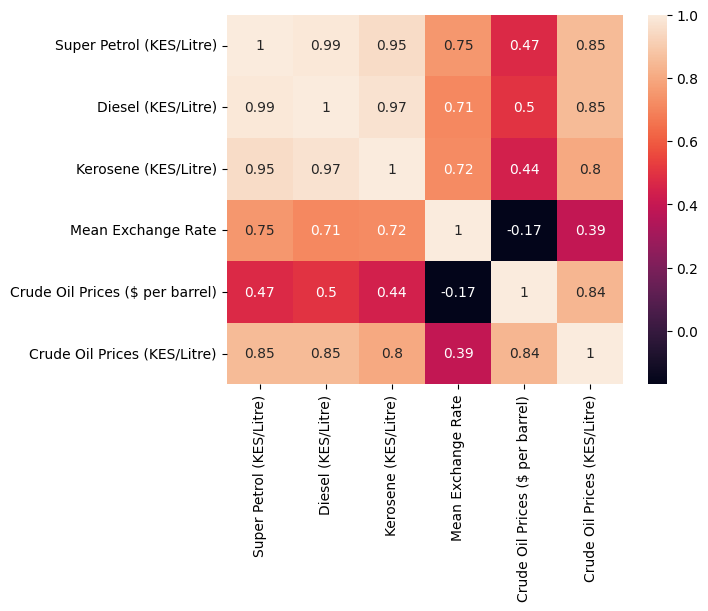

In [9]:
#checking columns correlation
matrix = df.corr(numeric_only=True).round(2)
sns.heatmap(matrix, annot=True)
plt.show()


In [10]:
print(df.columns)

Index(['Price Commencement Date', 'Super Petrol (KES/Litre)',
       'Diesel (KES/Litre)', 'Kerosene (KES/Litre)', 'Mean Exchange Rate',
       'Crude Oil Prices ($ per barrel)', 'Crude Oil Prices (KES/Litre)'],
      dtype='object')


In [11]:
df.drop(columns=["Crude Oil Prices ($ per barrel)","Price Commencement Date"], inplace=True)

In [12]:
df.isna().sum()

Super Petrol (KES/Litre)        0
Diesel (KES/Litre)              0
Kerosene (KES/Litre)            0
Mean Exchange Rate              0
Crude Oil Prices (KES/Litre)    0
dtype: int64

In [13]:
df.describe()

,Super Petrol (KES/Litre),Diesel (KES/Litre),Kerosene (KES/Litre),Mean Exchange Rate,Crude Oil Prices (KES/Litre)
count,156.000000,156.000000,156.000000,156.000000,156.000000
mean,116.921795,105.686987,90.089872,102.175769,46.676538
std,27.018611,25.624257,29.563883,15.491132,15.268060
min,80.710000,65.700000,39.620000,80.570000,11.850000
25%,101.275000,90.812500,71.420000,88.657500,34.437500
50%,111.435000,103.250000,84.110000,101.385000,45.940000
75%,118.207500,108.045000,102.032500,107.662500,54.277500
max,217.360000,205.470000,205.060000,155.640000,89.180000


## Model Building

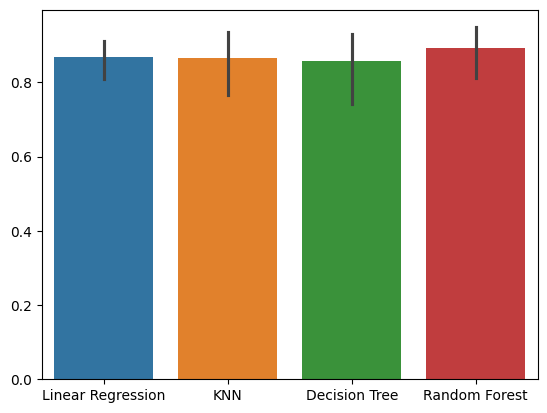

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


import numpy as np

# Assuming df is your DataFrame containing the relevant data

# Extracting input features (X)
x = df[['Mean Exchange Rate', 'Crude Oil Prices (KES/Litre)']].values

# Extracting target variables (y)
y = df[['Super Petrol (KES/Litre)', 'Diesel (KES/Litre)', 'Kerosene (KES/Litre)']].values

# Check the lengths of x and y
#print("Length of x:", len(x))
#print("Length of y:", len(y))

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the regressor (e.g., Linear Regression) for multi-output regression
regressor = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Wrap the regressor in MultiOutputRegressor for multi-output regression
multi_output_regressor = MultiOutputRegressor(LinearRegression())  # Example base estimator, replace with appropriate one
multi_output_regressor.estimators = list(regressor.values())

# Fit the multi-output regressor
multi_output_regressor.fit(x_train_scaled, y_train)

results = []
# Evaluate the multi-output regressor using cross-validation
for model in regressor.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, x_train_scaled, y_train, cv=kf)
    results.append(cv_results)

results_transposed = list(zip(*results))

# Convert results to DataFrame
results_df = pd.DataFrame(results_transposed, columns=regressor.keys())

# Plotting the results
sns.barplot(data=results_df)
plt.show()

In [15]:
for name, model in regressor.items():
    model.fit(x_train_scaled,y_train)
    test_score=model.score(x_test_scaled,y_test)
    print("{} Test set Accurecy:{}".format(name,test_score))

Linear Regression Test set Accurecy:0.8506582696411608
KNN Test set Accurecy:0.9326290744407076
Decision Tree Test set Accurecy:0.859819620282651
Random Forest Test set Accurecy:0.929016797259041
